# CS229 - Spring 2024 - HW0 - MLP 
Submit **PDF** of completed IPython notebook on Canvas. 

If you have done something similar before (trained an MLP) you can upload that in Canvas and leave a comment. 
(E.g. HW 2 of CS-224 with me, or something similar from another class.) 

**Due**: April 12, 2024 @ 11:59pm PDT

**Maximum points**: 5

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: [Enter Your Name here]
  </br>
  <b>Student ID Number</b>:  [Enter Your SID here]
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

# Overview 
In this assignment you will train an MLP to predict whether or not images of cats are "deepfakes", i.e., generated by AI. (I used SD 1.5, and down-sampled to match CIFAR-10, which we use for real images.) 

In [1]:
import torch
# The following functions were discussed in week 4 demo
import torch.nn as nn  # neural net layers and activations
from torch.optim import SGD  # Our chosen optimizer
from torch.utils.data import DataLoader, TensorDataset  # Super useful data utilities!

# We discussed all these in week 3 demo: 
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Used for visualization
import torchvision.utils as vutils
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Turn off some annoying convergence warnings from sklearn
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

## **Obtain and inspect data**
Data file link should be available with homework on canvas.
You'll have to make them available locally or upload them to your colab instance.

Data shapes before flattening:
X: torch.Size([2000, 3, 32, 32])
y: torch.Size([2000])
X shape after flattening: torch.Size([2000, 3072])



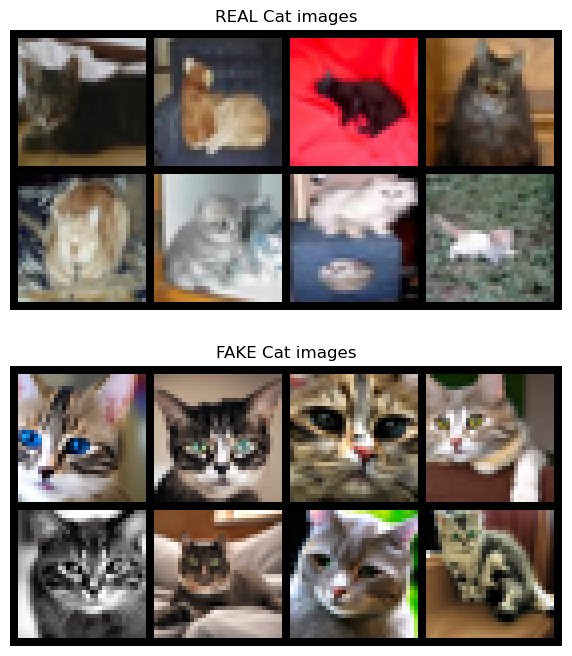

In [2]:
# Load dataset and visualize
X, y = torch.load('hw0_data.pt')

print('Data shapes before flattening:')
print('X:', X.shape)  # 2000, 3, 32, 32, 2000 images, channel, height width
print('y:', y.shape)  # 2000 binary labels 0 is real, 1 is fake

# Print examples from each class
grid = vutils.make_grid(X[y==0][:8], nrow=4, padding=2, normalize=True)
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].axis('off')
axs[0].set_title('REAL Cat images')
axs[0].imshow(grid.numpy().transpose((1, 2, 0)))

grid = vutils.make_grid(X[y==1][:8], nrow=4, padding=2, normalize=True)
axs[1].axis('off')
axs[1].set_title('FAKE Cat images')
axs[1].imshow(grid.numpy().transpose((1, 2, 0)))


X = X.flatten(start_dim=1)  # From now on, we work with the flattened vector
print(f"X shape after flattening: {X.shape}\n")

indices = torch.randperm(len(X))
X_train, y_train = X[indices[:1500]], y[indices[:1500]]
X_val, y_val = X[indices[1500:]], y[indices[1500:]]

## Define the model [3 points]

- As always, implement an __init__ function and a forward function
- Use Linear layers with ReLU activations for the hidden layers
- 2 layers of hidden units. First layer has 128 hidden units, second layer has 64 hidden units. 
- Output represents *binary* logits (must have correct shape to do that!)

In [4]:
class MyMLP(nn.Module):
    # TODO: Define a multilayer perceptron [3 points]. Criteria above
    def __init__(self):
        super(MyMLP, self).__init__()

    def forward(self, x):
        return 


## Train [2 points]
Train your neural net, following CS 224 week 4 code example (available in Modules of CS 229)

In [5]:
# TODO [2 points]: train your model 
# Don't forget to set model.train() during training, then model.eval() after done
# It doesn't matter in this case, but is good practice to prevent future bugs. 
# Be sure to output final validation loss
learning_rate = 0.1
weight_decay = 0.
batch_size = 50
n_epochs = 100

# TODO: Initialize model, criterion (Cross entropy loss), and optimizer (SGD)
for _ in range(n_epochs):
    # TODO: Train on X_train, y_train, with cross entropy loss


            
            
# Evaluate on validation (don't forget model.eval())
val_loss = 0.
print('Validation loss is: ', val_loss)